## Question 2B
Take a grayscale image of size $512*512$ and differentiate the results of power law and inverse logarithmic transformation.

In [73]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2 as cv

#### Logarithmic Transformation
Logarithmic transformation of a pixel intensity `a` will be achived by the following equation:
$$ s = c*log{}{(1+a)} $$
where `c` can be calculated as:
$$ c = {255 \over log{}{(1 + max\_intensity)}} $$

In [74]:

def logarithmic_transform(input):
    #c = 255 / np.log(1 + np.max(input))
    c = 1
    output = c * (np.log(input + 1))
    output = np.array(output, dtype='uint8')
    return output



#### Inverse Logarithmic Transformation (Anti-Log)
Inverse logarithmic transformation of a pixel intensity `a` will be achived by the following equation:
$$ s = (e^r)^\frac{1}{c}-1 $$
where `c` can be calculated as:
$$ c = {255 \over log{}{(1 + maxintensity)}} $$

In [75]:
def antilog_transformation(input):
    #c = 255 / np.log(1 + 255)
    c = 1
    output = np.exp(input)**(1/c)-1
    #output = np.array(output, dtype=np.uint8)
    return output

#### Power Law Transformation
Power law transformation can be written as follows:
$$ s = c*r^\gamma $$
where,  
$s$ = output image pixel  
$c$ = constant (we usually set c to 1)  
$r$ = input image pixel  
$\gamma$ = can be a value

In [76]:
def power_law_transformation(input, gamma):
    output = input**gamma
    #output = np.array(output, dtype = np.uint8)
    return output

In [77]:
original_image = cv.imread('head.tif', 0)
original_image_scaled = original_image/255
log_image = logarithmic_transform(original_image)
alog_image = antilog_transformation(original_image_scaled)
gamma_image = power_law_transformation(original_image_scaled, 2.5)

/tmp/ipykernel_15742/2031776569.py:4: RuntimeWarning: divide by zero encountered in log
  output = c * (np.log(input + 1))
/tmp/ipykernel_15742/2031776569.py:5: RuntimeWarning: invalid value encountered in cast
  output = np.array(output, dtype='uint8')


Text(0.5, 1.0, 'Power Law Transformation')

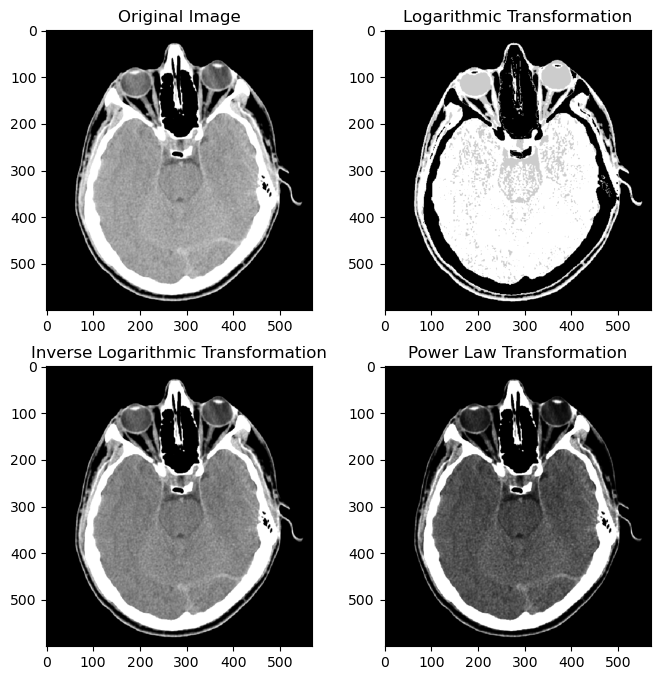

In [78]:
# plotting all the image
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")

plt.subplot(2, 2, 2)
plt.imshow(log_image, cmap='gray')
plt.title("Logarithmic Transformation")

plt.subplot(2, 2, 3)
plt.imshow(alog_image, cmap='gray')
plt.title("Inverse Logarithmic Transformation")

plt.subplot(2, 2, 4)
plt.imshow(gamma_image, cmap='gray')
plt.title("Power Law Transformation")